# *Trabajo pŕactico organización de datos*

## 1.  Intoducción

Este trabajo consiste en realizar un análisis profundo sobre un determinado set de datos para de esta manera afianzar los contenídos vistos durante el curso. 
El trabajo se dividirá en diferentes secciones para facilitar su lectura y mantener un orden a la hora de sacar conclusiones.

## 2. Importación de librerías

En esta sección se importaran las librerías cuyas herramientas utilizaremos en el trancurso de todo el trabajo.

In [11]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos y primeras impresiones

In [12]:
### 3.1 Lectura de los datos

Se dispone de un archivo csv que nos brinda información sobre propiedades en venta en el país de Mexico. Cada linea del archivo nos da información sobre una de las propiedades. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluída en el archivo. Se tratará a los datos como un Dataframe.

In [13]:
df = pd.read_csv('train.csv')

In [14]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


### 3.2 Dimensiones del Dataframe

In [6]:
dimensiones= df.shape
print("Cantidad de filas:", dimensiones[0])
print("Cantidad de columnas:", dimensiones[1])
print("Tamaño del Dataframe:", df.size)

('Cantidad de filas:', 240000)
('Cantidad de columnas:', 23)
('Tama\xc3\xb1o del Dataframe:', 5520000)


### 3.3 Caracterísitcas principales del Dataframe

Se incluye una lista de todas las columnas con sus tipos de datos y el número de valores no nulos en cada columna. A su vez conocemos tambien los tipos de datos con los que estaremos trabjando.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

## 3.4 Datos faltantes en el Dataframe


No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber cuántos de esos registros tienen información faltante


###  3.4.1 Datos faltantes por columna


In [10]:
serie_nulos=df.isnull().any()
lista_nulos=list(df.columns)
df_muestra_de_info=pd.DataFrame(index=lista_nulos)
lista_aux=[]
for indice in range(0,len(lista_nulos)):
        if serie_nulos.iloc[indice]== True:
            lista_aux.append("Si")
        else:
            lista_aux.append("No")
df_muestra_de_info['Faltan datos']=lista_aux 
cantidad_de_nans=[]

for campo in lista_nulos:
    cantidad_de_nans.append(len(obtener_filas_con_Nan(df,campo)))

df_muestra_de_info['Cantidad']=cantidad_de_nans
df_muestra_de_info.head(23)


,Faltan datos,Cantidad
id,No,0
titulo,Si,5387
descripcion,Si,1619
tipodepropiedad,Si,46
direccion,Si,53072
ciudad,Si,372
provincia,Si,155
antiguedad,Si,43555
habitaciones,Si,22471
garages,Si,37765


### 3.4.2 Cantidad de datos faltantes


In [11]:
cantidad_de_nulos=df.isnull().sum().sum()
print("Cantidad de Nans en el DataFrame: "+ str(cantidad_de_nulos))

Cantidad de Nans en el DataFrame: 535127


## 4. Análisis de Datos

En las secciones anteriores se realizó la carga de los datos y se obtubo información general del Dataframe de manera tal de familiarizarnos con la información con la que se estará trabajando durante el trabajo práctico. A partir de ahora se comenzará con el análisis de dichos datos donde iremos explorando el Dataframe para obtener resultados que nos permitan sacar conclusiones sobre la venta de propiedades en México.

### 4.1 Cantidad de propiedades:

Es interesante conocer la cantidad de propiedades de la que disponemos. Como cada fila del Dataframe se corresponde con una propiedad, la cantidad de propiedades se corresponde con la cantidad de filas del dataframe:


In [18]:
print("Cantidad de propiedades:", dimensiones[0])

Cantidad de propiedades: 240000


### 4.2 Tipo de propiedades:

Las propiedades en venta pueden ser de diferentes tipos. A continuación se muestran cuales son los tipo de propiedadas con los que estaremos trabajando como tambien la cantidad de propiedades en venta de cada uno de ellos.

In [19]:
df['tipodepropiedad'].value_counts() 

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

Total tipos de propiedad: 24


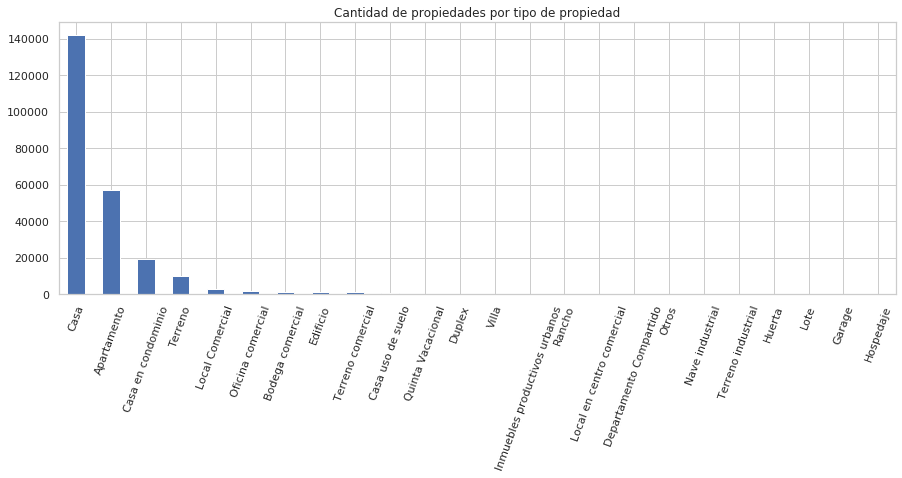

In [20]:
print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");
#roba3 del tutorial, no cuenta

## 4.3 Ubicación de las propiedades

### 4.3.1 Cantidad de propiedades por provincia

Vimos que el set de datos se corresponde a propiedades en venta distribuídas en el país de México. Este país divide en provincias. Veamos cuantas propiedades hay por cada provincia:

In [21]:
df.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

Total de provincias: 32


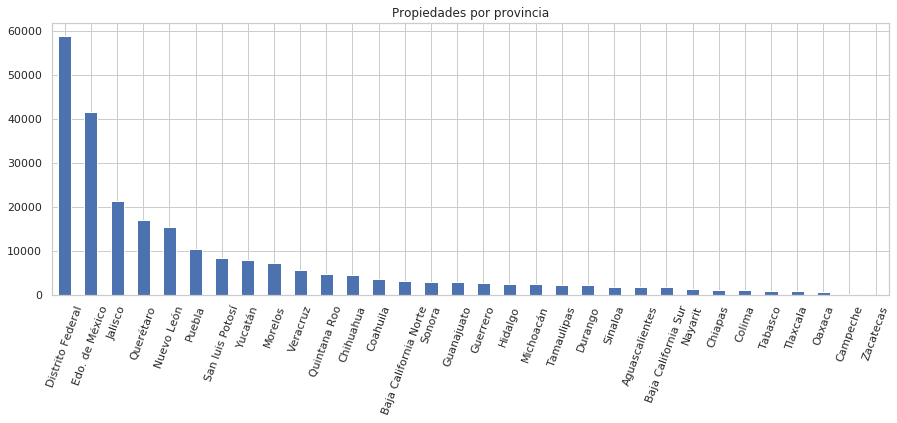

In [22]:
print(f"Total de provincias: {df.provincia.nunique()}")
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");
#robado parte 2

### 4.3.2 Cantidad de propiedades en venta por ciudad

Las provincias se dividen en ciudades. Veamos para cada provincia cuantas propiedades en venta hay en cada ciudad.

In [12]:
grouped = df.groupby(['provincia','ciudad'])['ciudad'].agg(['size'])
grouped.columns = ['Propiedades por ciudad']

### 4.3.3 ¿Cuáles son las provincias con mayor cantidad de algún tipo de propiedad?

Es interesante conocer cuales son las provincias que tiene mayor cantidad de propiedades de algún tipo en específico en venta. A modo de ejemplo veamos el top 3 de las provincias con mayor cantidad de casas en venta.

In [24]:
print(" Las 3 provincias con mayor cantidad de casas en venta son: ")
df.loc[df.tipodepropiedad == "Casa", : ]["provincia"].value_counts().head(3)

 Las 3 provincias con mayor cantidad de casas en venta son: 


Edo. de México      25938
Distrito Federal    15812
Jalisco             14196
Name: provincia, dtype: int64

Otro ejemplo podría ser conocer cual es la provincia con mayor cantidad de huertas en venta.

In [25]:
print(" La provincia con mayor cantidad de Huertas en venta es:")
df.loc[df.tipodepropiedad == "Huerta", :]["provincia"].value_counts().head(1)

 La provincia con mayor cantidad de Huertas en venta es:


Chihuahua    7
Name: provincia, dtype: int64

Supongamos ahora que queremos generalizarlo y calculemos para cada tipo de propiedad cuál es la provincia que tiene mayor cantidad de propiedades en venta de cada tipo.

In [26]:
tipos = df["tipodepropiedad"].dropna().unique()
for tipo in tipos:
    print ("\nTIPO: " + tipo)
    print(df.loc[df.tipodepropiedad == tipo, :]["provincia"].value_counts().head(1))
    
#dfaux = df.groupby(['tipodepropiedad','provincia'])\
#    .agg({ 'tipodepropiedad':'size'}) #necesito averiguar como quedarme con 
                                       #el mayor de cada zona y ya está
#dfaux


TIPO: Apartamento
Distrito Federal    33839
Name: provincia, dtype: int64

TIPO: Casa en condominio
Edo. de México    4717
Name: provincia, dtype: int64

TIPO: Casa
Edo. de México    25938
Name: provincia, dtype: int64

TIPO: Terreno
Distrito Federal    1677
Name: provincia, dtype: int64

TIPO: Terreno comercial
San luis Potosí    234
Name: provincia, dtype: int64

TIPO: Local Comercial
Distrito Federal    471
Name: provincia, dtype: int64

TIPO: Quinta Vacacional
Nuevo León    205
Name: provincia, dtype: int64

TIPO: Oficina comercial
Distrito Federal    736
Name: provincia, dtype: int64

TIPO: Edificio
Distrito Federal    616
Name: provincia, dtype: int64

TIPO: Casa uso de suelo
Distrito Federal    277
Name: provincia, dtype: int64

TIPO: Local en centro comercial
Jalisco    54
Name: provincia, dtype: int64

TIPO: Bodega comercial
Distrito Federal    322
Name: provincia, dtype: int64

TIPO: Otros
Querétaro    34
Name: provincia, dtype: int64

TIPO: Villa
Guerrero    90
Name: provin

### 4.3.4 Antiguedad de propiedades segun provincia

Queremos ver que provincia tiene en promedio las propiedades más antiguas.

In [27]:
antiguedad_por_zona = df.groupby('provincia')['antiguedad'].agg(['size','sum','mean']).round(2)
antiguedad_por_zona.columns = ['cantidad de propiedades', 'suma de las antiguedades (años)', 'antiguedad promedio(años)']
antiguedad_por_zona.sort_values('antiguedad promedio(años)', ascending = False)

,cantidad de propiedades,suma de las antiguedades (años),antiguedad promedio(años)
provincia,,,
Distrito Federal,58790,"630,800.00",12.19
Edo. de México,41607,"376,249.00",10.03
Guerrero,2678,"18,284.00",7.61
Nuevo León,15324,"85,133.00",7.54
Aguascalientes,1753,"11,633.00",7.52
Michoacán,2471,"12,343.00",7.06
Jalisco,21238,"119,008.00",6.64
Chihuahua,4590,"18,805.00",6.52
Morelos,7337,"37,963.00",6.46


### 4.3.5 Metros por provincia

Ahora analizaremos cuales son las provincias cuyas propiedades tienen en promedio mas metros.

In [28]:
tamaño_por_zona = df.groupby('provincia').agg({'metrostotales': ['size', 'sum', 'mean']})
tamaño_por_zona.columns = ['cantidad de propiedades', 'metros totales','promedio']
tamaño_por_zona.sort_values('promedio', ascending=False)

,cantidad de propiedades,metros totales,promedio
provincia,,,
Yucatán,7928,"1,530,094.00",261.06
Chihuahua,4590,"855,017.00",213.81
Morelos,7337,"988,582.00",209.62
Coahuila,3695,"682,032.00",208.89
Campeche,263,"46,865.00",204.65
Sonora,2988,"527,249.00",196.22
Querétaro,16988,"2,824,860.00",193.44
Quintana Roo,4756,"667,887.00",189.26
Durango,2275,"389,575.00",184.11


## 4.4 Análisis de precios

En esta sacción se analizará como afectan al precio de las propiedades diferentes factores. El precio de una propiedad 
puede variar dependiendo la ubicación, los metros que ocupa, la cantidad de habitaciones, si tiene o no piscina, etc. 

### 4.4.1 Precio de propiedades según provincia

En primer lugar veremos cuanto afecta al valor de una propiedad su ubicación, para ello analizaremos el precio promedio de las propiedades segun la provincia en la que se ubican.

In [29]:
precios_promedio = df.groupby('provincia')['precio'].agg(['mean'])
precios_promedio.columns = ['Precio promedio']
precios_promedio.sort_values('Precio promedio', ascending=False)

,Precio promedio
provincia,
Distrito Federal,"3,471,705.09"
Edo. de México,"2,762,464.91"
Nuevo León,"2,717,757.65"
Guerrero,"2,548,741.86"
Quintana Roo,"2,402,966.94"
Jalisco,"2,367,693.58"
Tabasco,"2,300,480.23"
Puebla,"2,298,403.64"
Morelos,"2,290,088.01"


## 4.4.2 Variación del precio según cantidad de habitaciones

Un factor decisivo que influye sobre el precio de las propiedades es la cantidad de las habitaciones de las que dispone. En este apartado se sacaran conclusiones sobre la influencia de este factor en los precios de las propiedades.
Para que el analisis sea eficiente se considerarán propiedades donde el resto de las caracteristicas sea similar.

Por ejemplo: Consideremos solo las casas a estrenar ubicadas en Distrito Federal con un solo garage y sin piscina. Tanto la ubicacion de las propiedades como si tiene o no garage o piscina son factores que podrian influir en el precio de la misma, por este motivo se bucan propiedades donde estos factores no varien demasiado.

In [30]:
df_resultados= df.loc[df.provincia == 'Distrito Federal',:].loc[df.tipodepropiedad == 'Casa',:].loc[df.garages == 1].loc[df.antiguedad == 0].loc[df.piscina==0].groupby('habitaciones')['precio'].agg(['size','mean'])
df_resultados.columns = ['cantidad de propiedades','precio promedio']
df_resultados.sort_values('precio promedio', ascending=False)

,cantidad de propiedades,precio promedio
habitaciones,,
4.00,13,"3,922,938.46"
5.00,3,"2,165,000.00"
6.00,3,"1,890,666.67"
3.00,46,"1,805,524.35"
2.00,29,"1,313,944.93"
1.00,7,"1,307,142.86"


### 4.4.3 El impacto de las piscinas en el precio 

Otro de los factores determinantes a la hora de comprar una propiedad es si esta tiene o no piscina. Consideremos una ciudades mas calurosas de Mexico como lo es 'Baja California'. Tomemos casas para una familia tipo, dos habitaciones y un garage con una antiguedad menor a 5 años. Para estas propiedades calculemos el promedio de precios distinguiendo si las casas tienen o no piscina.

In [60]:
df_aux= df.loc[df.provincia == 'Baja California Sur'].loc[df.tipodepropiedad == 'Casa'].loc[df.antiguedad <= 5].loc[df.habitaciones == 2].loc[df.garages==1]
df_precios_promedio= df_aux.groupby('piscina')['precio'].agg(['mean'])   
df_precios_promedio.columns=['precio promedio']
df_precios_promedio

,precio promedio
piscina,
0.00,"571,790.59"
1.00,"950,000.00"


**OBS:** se puede observar el gran impacto en el precio que tienen las piscinas ya que para propiedades de similares caracteristicas el precio promedio con piscina es ampliamente superior al precio promedio sin ellas.
 

### 4.algo      El impacto de poseer garage en el precio

Otro factor que influye sobre el precio es si la propiedad posee o no garage. En éste apartado se analizará la variación del precio de la propiedad con garage respecto a si no lo posee. Se asume que el precio de una propiedad con garage es mayor que la misma si no lo tuviera


En apartados anteriores se analizó el impacto de la ubicación de la propiedad y la cantidad de habitaciones en el precio de la propiedad. Para ampliar ésta información, el análisis de los cambios en el precio se realizarán en las propiedades agrupadas segun la provincia en la que se encuentran y en la cantidad de habitaciones que poseen

Puede ocurrir que para un determinado numero de habitaciones en una determinada ciudad, no haya informacion sobre propiedades con garage pero si las hay para propiedades sin garage, y viceversa. En tales casos la información mostrada reflejará esta situación, mostrando una variación en el precio de la propiedad de 0%.

In [119]:
#para hacer este análisis necesito reducir la cantidad de variables de conjunto de datos a uno
#que solamente posea dos opciones posibles: tiene garage y no tiene garage. 
#entonces agrupo por cantidad de habitaciones y por ubicacion (provincia) 

df_garages=df.loc[df.garages==1]
df_sin_garages=df.loc[df.garages==0]
df_garages=df_garages.groupby(['ciudad','habitaciones']).aggregate({'precio' : 'mean'})
df_garages.columns=['precio medio con garage']

df_sin_garages=df_sin_garages=df.groupby(['ciudad','habitaciones']).aggregate({'precio': 'mean'})
df_sin_garages.columns=['precio medio sin garage']
df_muestra=pd.merge(df_garages,df_sin_garages, on=['ciudad','habitaciones'])

#ahora tomando el precio medio sin garage como muestra,considerando que no tener garage debería ser mas barato que tener
#me fijo en cuanto impacta la existencia del garage

serie_con_garage=df_muestra.iloc[:,0]
serie_sin_garage=df_muestra.iloc[:,1]

precio_con_garage=[]
for elemento in serie_con_garage:
    precio_con_garage.append(elemento)
precio_sin_garage=[]
for elemento in serie_sin_garage:
    precio_sin_garage.append(elemento)
lista_porcentajes=[]
for x in range (0,len(precio_con_garage)):
    numero=abs(float(precio_sin_garage[x]-precio_con_garage[x]))
    numero=numero/float(precio_sin_garage[x])
    numero=numero*100
    lista_porcentajes.append(numero)

df_muestra['Variacion del precio respecto a propiedad sin garage en %']=lista_porcentajes
df_muestra

precio medio con garage  \
ciudad                habitaciones                            
Acajete               1.00                     2,368,686.00   
Acambay               2.00                       450,000.00   
Acapulco de Juárez    1.00                     1,359,286.86   
                      2.00                     1,297,424.99   
                      3.00                     2,041,683.87   
                      4.00                     3,515,209.22   
                      5.00                     2,853,846.15   
                      6.00                     3,433,333.33   
                      8.00                     1,100,000.00   
Acateno               1.00                     1,100,000.00   
Acayucan              2.00                       380,000.00   
Acolman               1.00                       392,222.22   
                      2.00                       480,640.00   
                      3.00                       614,000.00   
                      4.00                     1,200,000.00   
                      5.00                       850,000.00   
Actopan               2.00                       490,000.00   
                      3.00                       330,000.00   
Acuña                 2.00                     5,000,000.00   
                      3.00                       850,000.00   
Agua Dulce            4.00                       750,000.00   
Agua Prieta           3.00                       398,503.00   
Aguascalientes        1.00                     1,286,666.67   
                      2.00                       572,250.55   
                      3.00                       825,201.11   
                      4.00                     1,041,777.78   
                      5.00                       999,376.92   
                      6.00                     1,499,333.22   
                      8.00                     1,083,333.33   
Ahome                 1.00                       410,000.00   
...                                                     ...   
Zapopan               6.00                     1,797,500.00   
                      7.00                     2,995,000.00   
Zapotlán de Juárez    2.00                       690,000.00   
                      3.00                       660,000.00   
Zapotlán el Grande    3.00                       950,000.00   
                      5.00                     1,200,000.00   
Zaragoza              3.00                     2,500,000.00   
Zempoala              2.00                       473,700.00   
                      3.00                       728,750.00   
                      4.00                       850,000.00   
Zihuatanejo de Azueta 1.00                     2,800,000.00   
                      2.00                     1,850,368.30   
                      3.00                     2,738,643.32   
                      4.00                     2,507,500.00   
Zimatlán de Alvarez   2.00                       950,000.00   
Zinacantepec          1.00                       385,000.00   
                      2.00                       671,026.32   
                      3.00                     1,499,833.33   
                      7.00                     4,500,000.00   
ZirAndaro             3.00                     1,100,000.00   
Zitácuaro             2.00                       580,000.00   
                      3.00                       650,000.00   
Zumpahuacán           3.00                       780,000.00   
Zumpango              1.00                       335,766.67   
                      2.00                       403,904.04   
                      3.00                       558,995.52   
otra                  2.00                     1,690,542.00   
                      3.00                     2,625,000.00   
ácámbaro              1.00                     1,020,000.00   
                      5.00                     8,000,000.00   

                                    precio medio sin garage  \
ciu

## 4. algo    Precio de la propiedad segun según su antiguedad


Nos interesa saber como se ve afectado el precio de la propiedad basado en la antiguedad de la misma.

Caso 1: Análisis del valor de la propiedad según la antiguedad de la misma.

In [16]:
df_propiedades_antiguedad=df.groupby('antiguedad').agg({'precio':'mean'})
df_propiedades_antiguedad

,precio
antiguedad,
0.00,"2,478,478.97"
1.00,"2,635,362.52"
2.00,"2,790,816.37"
3.00,"2,616,412.59"
4.00,"2,562,077.38"
5.00,"2,374,731.74"
6.00,"2,214,881.99"
7.00,"2,141,595.38"
8.00,"2,050,722.53"


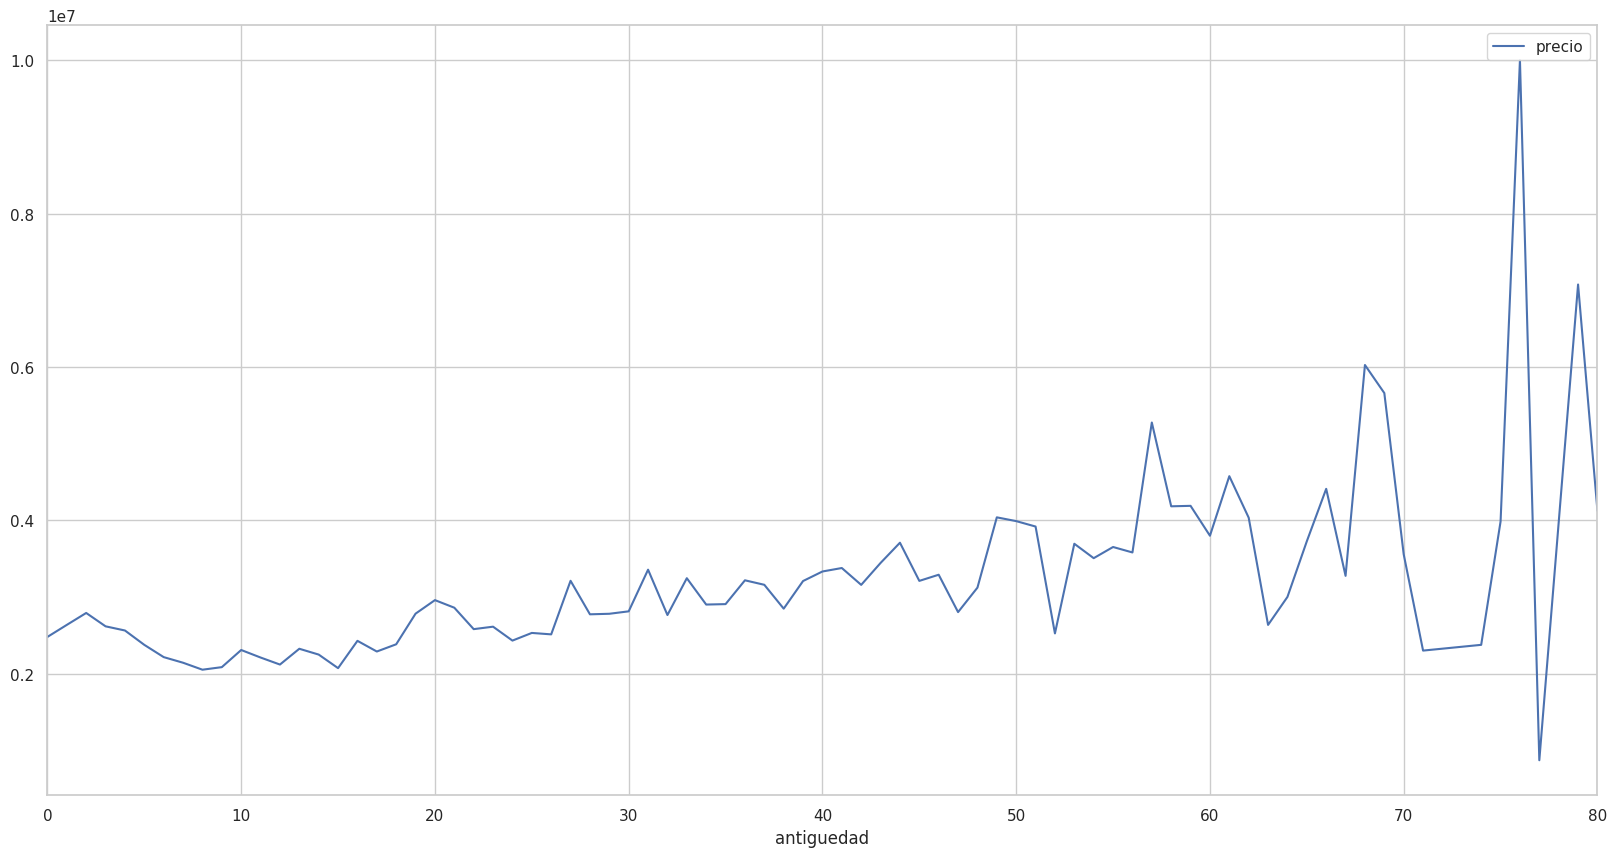

In [17]:
df_propiedades_antiguedad.plot()

Este gráfico toma en cuenta sólo la antiguedad de la propiedad, por lo que no puede sacarse conclusiones concretas sobre la relación de la propiedad y su antiguedad

Caso 2: Análisis del valor de la propiedad en función de la propiedad para propiedades con una cierta cantidad de habitaciones


In [29]:
df_antiguedad_habitaciones=df.groupby(['habitaciones','antiguedad']).agg({'precio':'mean'})
df_antiguedad_habitaciones

precio
habitaciones antiguedad                     
 1.00         0.00              2,043,046.07
              1.00              2,303,176.41
              2.00              2,109,800.68
              3.00              1,949,372.11
              4.00              2,055,111.89
              5.00              1,680,227.53
              6.00              1,580,465.95
              7.00              1,523,029.41
              8.00              1,533,400.00
              9.00                851,315.79
             10.00              1,265,823.08
             11.00              1,285,384.62
             12.00              1,409,271.43
             13.00              1,536,966.67
             14.00              1,626,000.00
             15.00              1,260,219.18
             16.00              1,122,857.14
             17.00              1,250,000.00
             18.00                948,181.82
             20.00              1,531,171.39
             21.00              1,395,666.67
             22.00              1,453,750.00
             23.00              1,054,557.17
             24.00                638,750.00
             25.00              1,321,413.79
             26.00              1,197,142.86
             27.00                713,500.00
             28.00                590,000.00
             29.00                933,333.33
             30.00              1,538,393.64
...                                      ...
10.00         1.00              4,725,000.00
              2.00              4,780,000.00
              3.00              3,950,000.00
              4.00              3,945,666.67
              5.00              4,598,930.87
              6.00              2,690,000.00
              7.00              3,350,000.00
              8.00              7,200,000.00
              9.00              5,425,000.00
             10.00              4,392,118.64
             11.00              1,298,000.00
             13.00                380,000.00
             14.00              2,750,000.00
             15.00              3,891,250.00
             17.00                850,000.00
             20.00              4,628,860.64
             21.00              3,950,000.00
             22.00              3,850,000.00
             25.00              1,370,000.00
             27.00              1,995,000.00
             28.00              3,560,000.00
             30.00              5,825,000.00
             31.00              5,000,000.00
             32.00              1,650,000.00
             35.00              2,300,000.00
             40.00              5,398,333.33
             45.00              7,500,000.00
             50.00              6,398,566.05
             69.00              8,200,000.00
             80.00              4,500,000.00

[508 rows x 1 columns]

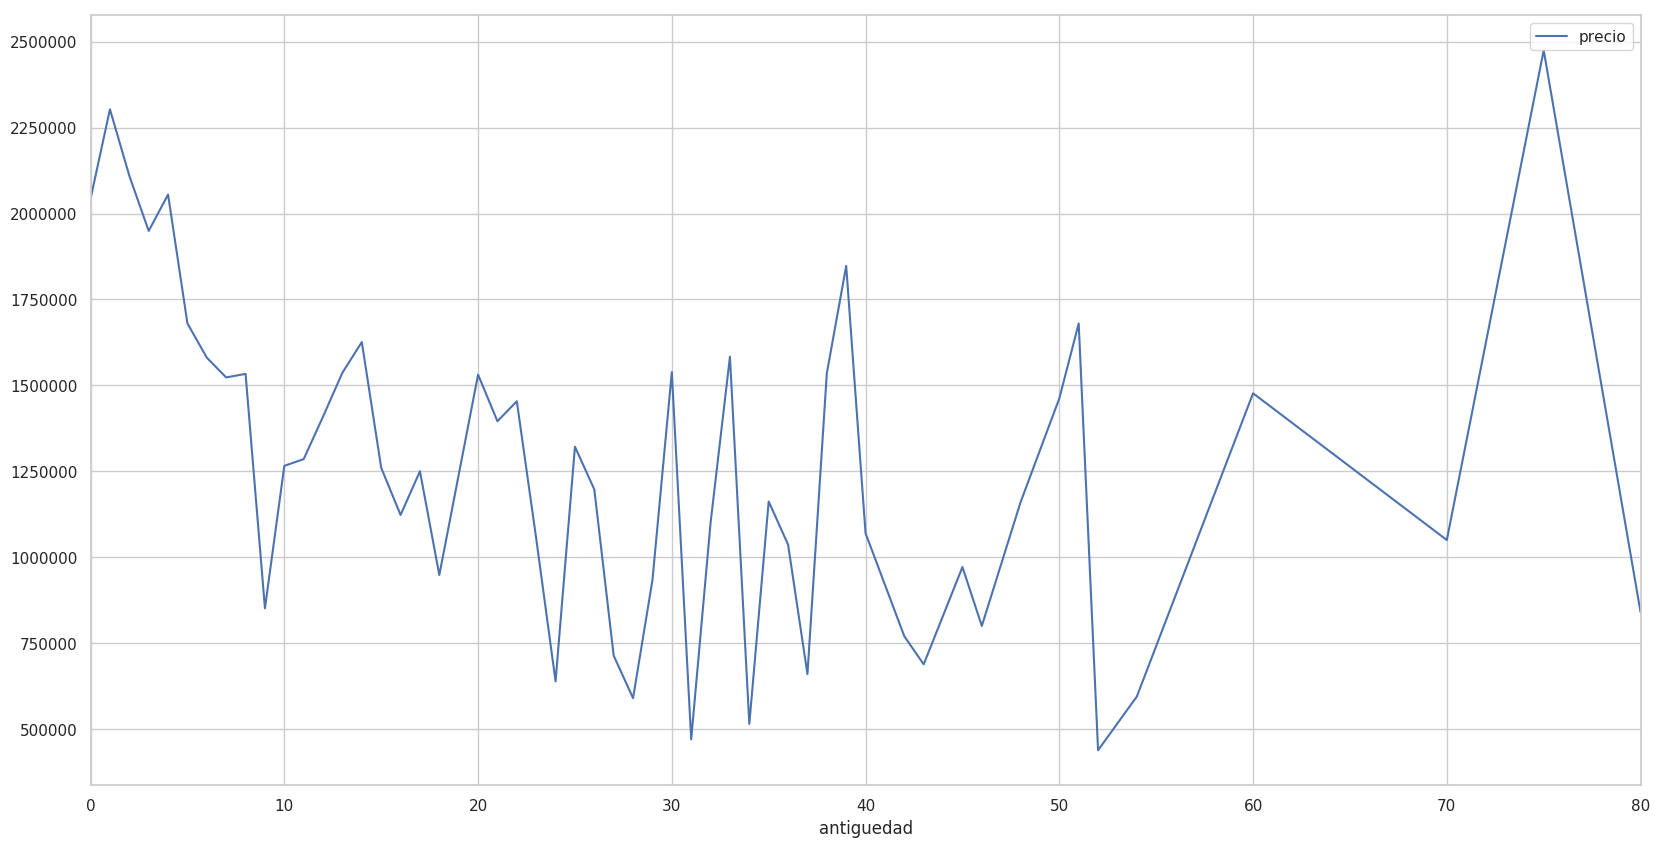

In [39]:
serie_1_habitacion=df_antiguedad_habitaciones.loc[1.00,:]
serie_1_habitacion.plot()

## 4.4.3 ¿Es influyente la cercanía a centros comerciales en el precio de la propiedad?

Dentro de una misma ciudad las propiedades pueden ubicarse en diferentes zonas. Veamos como afecta esto a los diferentes tipos de propiedades.

Para esto separemos a las propiedades en tres grupos diferentes: 

**GRUPO 1:** tipos de propiedades que la gente utiliza para vivir, como ser casas, departamente, condominios,etc.

**GRUPO 2:** comercios, como ser local comercial, oficina comercial, etc.

**GRUPO 3:** locales industriales

**OBS:** Las propiedades que no perenezcan a alguna de estas categorias no se tendran en cuenta para este análisis

In [15]:
comercios=['Local Comercial','Oficina comercial','Bodega comercial','Terreno comercial']
industrias=['Inmuebles productivos urbanos', 'Nave industrial','Terreno industrial','Casa uso de suelo']
viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Departamento Compartido','Hospedaje']

**¿Cómo afecta a los comercios?**

In [53]:
precio_promedio_leajanas= df.loc[df.tipodepropiedad.isin(comercios)].loc[df.centroscomercialescercanos==0]['precio'].mean().round(2)
precio_promedio_cercanas= df.loc[df.tipodepropiedad.isin(comercios)].loc[df.centroscomercialescercanos>0]['precio'].mean().round(2)
print('Promedio de precio propiedades lejanas a Centros comerciales: '+ str(precio_promedio_leajanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: '+ str(precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 2495844.14
Promedio de precio propiedades cercanas a Centros comerciales: 3085814.01


**¿Cómo afecta a las viviendas?**

In [54]:
precio_promedio_leajanas= df.loc[df.tipodepropiedad.isin(viviendas)].loc[df.centroscomercialescercanos==0]['precio'].mean().round(2)
precio_promedio_cercanas= df.loc[df.tipodepropiedad.isin(viviendas)].loc[df.centroscomercialescercanos>0]['precio'].mean().round(2)
print('Promedio de precio propiedades lejanas a Centros comerciales: '+ str(precio_promedio_leajanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: '+ str(precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 2496302.0
Promedio de precio propiedades cercanas a Centros comerciales: 2597532.52


**¿Cómo afecta a las propiedes destinadas a la producción?

In [55]:
precio_promedio_leajanas= df.loc[df.tipodepropiedad.isin(industrias)].loc[df.centroscomercialescercanos==0]['precio'].mean().round(2)
precio_promedio_cercanas= df.loc[df.tipodepropiedad.isin(industrias)].loc[df.centroscomercialescercanos>0]['precio'].mean().round(2)
print('Promedio de precio propiedades lejanas a Centros comerciales: '+ str(precio_promedio_leajanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: '+ str(precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 3535664.83
Promedio de precio propiedades cercanas a Centros comerciales: 4176779.76


**Conclusión:** Se puede ver como en todos los casos las propiedades que poseen centros comerciales cercanos son en promedio más caras. Sin embargo es para lo que es viviendas la diferencia no es tan notoria como si lo es para las propiedades destinadas al comercio y a la industria.

In [34]:
***************************HASTA ACA LLEGUÉ****************************************

SyntaxError: invalid syntax (<ipython-input-34-3326e2fb49e7>, line 1)

## 4.4.4 ¿Es influyente la cercanía a las escuelas en el precio de la propiedad?


Se realiza el mismo análisis del apartado anterior, siendo la cercanía de la propiedad a escuelas y su relación con el precio de la propiedad el objeto de estudio. Las propiedades serán agrupadas nuevamente en los grupos: Industria, Vivienda y Comercio



In [33]:
precio_promedio_cercanas=df.loc[df.tipodepropiedad.isin(viviendas)].loc[df.escuelascercanas>0]['precio'].mean().round(2)
precio_promedio_lejanas=df.loc[df.tipodepropiedad.isin(viviendas)].loc[df.escuelascercanas==0]['precio'].mean().round(2)

print('Precio promedio propiedades lejanas a escuelas: '+ str(precio_promedio_lejanas))
print('Precio promedio propiedades cercanas a escuelas: '+ str(precio_promedio_cercanas))

Precio promedio propiedades lejanas a escuelas: 2543614.88
Precio promedio propiedades cercanas a escuelas: 2530572.13


In [32]:
# caso industrias
precio_promedio_cercanas=df.loc[df.tipodepropiedad.isin(industrias)].loc[df.escuelascercanas>0]['precio'].mean().round(2)
precio_primedio_lejanas=df.loc[df.tipodepropiedad.isin(industrias)].loc[df.escuelascercanas==0]['precio'].mean().round(2)
print('Precio promedio propieades lejanas a escuelas: '+ str(precio_promedio_lejanas))
print('Precio promedio propiedades cercanas a escuelas: '+ str(precio_promedio_cercanas))

Precio promedio propieades lejanas a escuelas: 2530572.13
Precio promedio propiedades cercanas a escuelas: 4191297.84


In [36]:
#caso comercios
precio_promedio_cercanas=df.loc[df.tipodepropiedad.isin(comercios)].loc[df.escuelascercanas>0]['precio'].mean().round(2)
precio_promedio_lejanas=df.loc[df.tipodepropiedad.isin(comercios)].loc[df.escuelascercanas==0]['precio'].mean().round(2)
print('Precio promedio propiedades lejanas a escuelas: '+ str(precio_promedio_lejanas))
print('Precio promedio propiedades cercanas a escuelas: '+ str(precio_promedio_cercanas))

Precio promedio propiedades lejanas a escuelas: 2530785.8
Precio promedio propiedades cercanas a escuelas: 3002277.28


In [189]:
df.nlargest(5, ['precio','metrostotales'])
#Curiosamente las 5 más caras pertenecen al distrito federal, con razón es la más cara


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
174276,153761,wtc oficina en venta piso 17,excelente oficina en venta en torre world trad...,Oficina comercial,Montecito 38,Benito Juárez,Distrito Federal,10.00,nan,0.00,...,"23,569.00",19.39,-99.17,2015-09-04 00:00:00,0.00,0.00,0.00,0.00,0.00,"12,525,000.00"
209858,181271,excelente condominio ubicado al sur de la ciud...,condominio tipo mexicano moderno de 3 casas ub...,Casa,Congreso 210,Tlalpan,Distrito Federal,0.00,3.00,nan,...,"24,763.00",19.28,-99.17,2016-10-25 00:00:00,0.00,0.00,0.00,1.00,1.00,"12,521,000.00"
81715,64975,amsterdam town house dos niveles y terraza,proyecto de imanol legorreta y carlos duclaud ...,Apartamento,Amsterdam,Cuauhtémoc,Distrito Federal,5.00,3.00,3.00,...,"23,814.00",19.42,-99.17,2016-05-16 00:00:00,0.00,0.00,0.00,1.00,1.00,"12,520,000.00"
192956,279973,departamento en kansas . col nápoles,"edificio de 5 niveles con 9 departamentos, ofr...",Apartamento,Kansas 167,Benito Juárez,Distrito Federal,0.00,2.00,2.00,...,"23,573.00",19.39,-99.18,2016-11-04 00:00:00,0.00,0.00,0.00,1.00,1.00,"12,516,000.00"
232457,165404,excelente casa de lujo en venta en jardines de...,¡excelente oportunidad de inversión! nosotros ...,Casa,CASCADA #24,Alvaro Obregón,Distrito Federal,5.00,4.00,nan,...,"23,384.00",19.33,-99.20,2014-07-29 00:00:00,1.00,0.00,0.00,1.00,1.00,"12,515,000.00"


Veamos las 5 propiedades más caras y con más metros 

In [ ]:
#ciudades = df['ciudad']
#ciudades.value_counts()

In [25]:
df.isnull().sum()
df.dropna(subset=['titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','idzona','lat','lng'])\
.isnull().sum() #elimino los nulos, habiamos discutido si lo hacemos o no

id                            0
titulo                        0
descripcion                   0
tipodepropiedad               0
direccion                     0
ciudad                        0
provincia                     0
antiguedad                    0
habitaciones                  0
garages                       0
banos                         0
metroscubiertos               0
metrostotales                 0
idzona                        0
lat                           0
lng                           0
fecha                         0
gimnasio                      0
usosmultiples                 0
piscina                       0
escuelascercanas              0
centroscomercialescercanos    0
precio                        0
dtype: int64

In [26]:
df.memory_usage() #deriamos castear datos para que ocupen menos espacio

Index                             128
id                            1920000
titulo                        1920000
descripcion                   1920000
tipodepropiedad               1920000
direccion                     1920000
ciudad                        1920000
provincia                     1920000
antiguedad                    1920000
habitaciones                  1920000
garages                       1920000
banos                         1920000
metroscubiertos               1920000
metrostotales                 1920000
idzona                        1920000
lat                           1920000
lng                           1920000
fecha                         1920000
gimnasio                      1920000
usosmultiples                 1920000
piscina                       1920000
escuelascercanas              1920000
centroscomercialescercanos    1920000
precio                        1920000
dtype: int64

In [27]:
#df.astype({'gimnasio': 'category','usosmultiples': 'category','piscina': 'category','escuelascercanas': 'int32','centroscomercialescercanos': 'int32'}).dtypes


In [ ]:
#df.dtypes

In [ ]:
df.info()
#deberiamos castear datos

In [ ]:
(df.memory_usage()/(1024*1024)).sum()

In [ ]:
df.describe()

In [ ]:
#df.plot.bar('habitaciones','precio') congela la computadora


#Hacer grafico


#print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
#df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70,mtitle="Cantidad de propiedades por tipo de propiedad");

In [ ]:
df.groupby('precio').agg(np.sum)
#el primero elemento tiene 1400 años de antiguedad, raro

In [ ]:
df3 = df.loc[df.antiguedad > 100.00]
#40233830
df3.head() #arriba aparece pero aca no, doble raro

In [ ]:
# agrupando usando multiples columnas
grouped = df.groupby(['provincia','ciudad'])\
    .agg({'habitaciones':['mean','sum'],'precio':'mean', 'antiguedad':'mean'}) #poner parametros mas
                                                            #interesantes que habitaciones y antiguedad
grouped

In [ ]:
df2 = df.loc[df.tipodepropiedad == 'Apartamento']
df2.info()

In [ ]:
df2.shape

In [ ]:
#fecha, fecha de que? de que se puso a la venta? de que se compró? o que? 

In [ ]:
#relacion entre latitud y longitud con el precio

In [ ]:
#comparacion entre el precio de las casas y los departamentos

In [ ]:
#

In [ ]:
# analicemos distribución de avisos por tipo de trabajo
workday_announcements = sns.countplot(x='tipodepropiedad', data=df, order=df['tipodepropiedad'].value_counts().index, orient='v')
workday_announcements.set_xticklabels(workday_announcements.get_xticklabels(),rotation=45)
workday_announcements.set_xlabel("Tipo de propiedades", fontsize=20)
workday_announcements.set_ylabel("Cantidad de Propiedades", fontsize=20)
workday_announcements.set_title("Cantidad de propiedades segun su clase", fontsize=20)

#Es un buen comienzo(?)

In [14]:
# analicemos distribución de avisos por seniority

#seniority_types = sns.countplot(x='ciudad', data=df, order=df['ciudad'].value_counts().index, orient='v')
#seniority_types.set_xticklabels(seniority_types.get_xticklabels(),rotation=45)
#seniority_types.set_xlabel("Ciudades", fontsize=20)
#seniority_types.set_ylabel("Cantidad de propiedades por ciudad", fontsize=20)
#seniority_types.set_title("Propiedades por ciudad", fontsize=20)

#Horrible

In [15]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);


NameError: name 'plt' is not defined

Error in callback <function post_execute at 0x7f420d9bc398> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

In [9]:
# comparacion de dos (o mas) campos con elementos faltantes
#funciones a usar:


#funcion para conseguir los numeros de las filas que tienen el campo especificado en la columna con un NaN
#devuelve una lista con las posiciones
#para que funcione bien, tiene que usar la clave por default del dataFrame. si se usa una clave compuesta
#o una clave que no sea enteros crecientes falla

def obtener_filas_con_Nan(df, nombreColumna):
    serie=df.loc[:,nombreColumna]
    serie=serie.isnull()
    lista_posiciones_nulas=[]
    contador=0
    for booleano in serie:
        if booleano is True:
            lista_posiciones_nulas.append(contador)
        contador+=1
    return lista_posiciones_nulas


def concatenarListasSinDuplicados(lista1,lista2):
    dicc={}
    for item in lista1:
        dicc[item]=1
    for item in lista2:
        dicc[item]=1
    return dicc.keys()

In [54]:
lista_id_faltantes=obtener_filas_con_Nan(df,'id')
print(lista_id_faltantes)

[]
